# Multinomial Logistic Regression for Sign Language Prediction (classification) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

## 01 ETL - importing dataset

In [2]:
import os 
os.getcwd()

'/Users/guntsv/Downloads/Github/Kiddeelab/machine-learning/02-Supervised-Learning/02-Classification/Multinomial_Logistic_Regression'

In [3]:
train_df = pd.read_csv('../../dataset/sign_language_dataset/sign_mnist_train.csv')
test_df = pd.read_csv('../../dataset/sign_language_dataset/sign_mnist_test.csv')

### Dataset Description

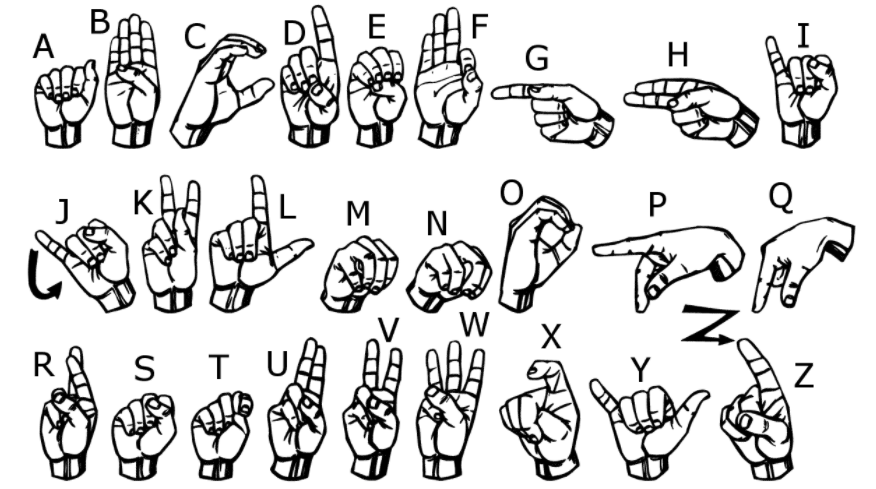

This dataset is in image format, thus it will show pixel values.

Label is the label of each image.

## 02 EDA - Exploring Data Analysis

### Checking Dataset's Column

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
train_columns = train_df.columns.values
test_columns = test_df.columns.values
len(train_columns), len(test_columns)

(785, 785)

In [7]:
import math
wh = math.sqrt(785)

# assert int(wh) == True, 'wh is not an integer value'

In [8]:
print("Number of images in Train dataset:", train_df.shape[0])
print("Number of images in Test dataset:", test_df.shape[0])

Number of images in Train dataset: 27455
Number of images in Test dataset: 7172


In [9]:
print("Checking Numbers of image per class:", train_df['label'].value_counts())

Checking Numbers of image per class: label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


### Assigning string data type to numerical data type

In [10]:
import string
# To map each label number to its corresponding letter
letters = dict(enumerate(string.ascii_uppercase))
print(letters)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


In [11]:
train_df.iloc[:,:] #Row,Column

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [12]:
def dataframe_to_array(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Extract input & outupts as numpy arrays
    input_array = dataframe1.iloc[:, 1:].to_numpy()
    output_array = dataframe1['label'].to_numpy()
    return input_array, output_array

In [13]:
train_input_array, train_output_array = dataframe_to_array(train_df)
test_input_array, test_output_array = dataframe_to_array(test_df)

In [14]:
print(train_input_array) # images are stored as array

[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]


In [15]:
print(train_output_array) # image labels are stored as array

[ 3  6  2 ... 18 17 23]


## 03 Image Visualization from Train Data

In [16]:
print(train_input_array.shape)
print("Number of images in training dataset: ", train_input_array.shape[0])
print("Number of pixel in each image:", train_input_array.shape[1])

(27455, 784)
Number of images in training dataset:  27455
Number of pixel in each image: 784


### Creating image from numpy arrary

Default cmap = 'viridis'

In [17]:
print(np.sqrt(784)) # 784 = 28 x 28

28.0


In [18]:
# ny.reshape(a, newshape, order='C')
np.array(train_input_array[0]) #.shape

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
       165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
       170, 169, 111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160,
       163, 164, 170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172,
       172, 171, 171, 170, 113, 123, 131, 137, 142, 145, 150, 152, 155,
       158, 161, 163, 164, 172, 105, 142, 170, 171, 171, 171, 172, 172,
       173, 173, 172, 171, 171, 171, 116, 125, 133, 139, 143, 146, 151,
       153, 156, 159, 162, 163, 167, 167,  95, 144, 171, 172, 172, 172,
       172, 172, 173, 173, 173, 172, 172, 171, 117, 126, 134, 140, 145,
       149, 153, 156, 158, 161, 163, 164, 175, 156,  87, 154, 172, 173,
       173, 173, 173, 173, 174, 174, 174, 173, 172, 172, 119, 128, 136,
       142, 146, 150, 153, 156, 159, 163, 165, 164, 184, 148,  89, 164,
       172, 174, 174, 174, 174, 175, 175, 174, 175, 174, 173, 173, 122,
       130, 138, 143, 147, 150, 154, 158, 162, 165, 166, 172, 18

Letter:  D


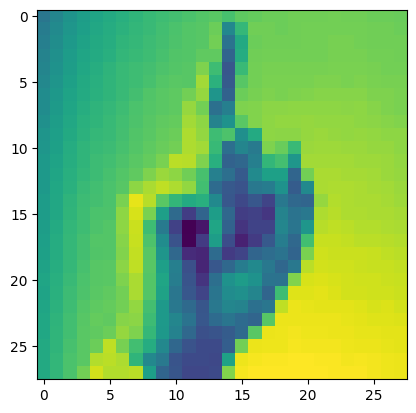

In [19]:
pic1 = np.reshape(train_input_array[0], (28, 28))
plt.imshow(pic1)
print("Letter: ", letters[train_output_array[0]])

In real dataset, images are in black and white, therefore, to display image in black and white, cmap = "gray"

Letter:  D


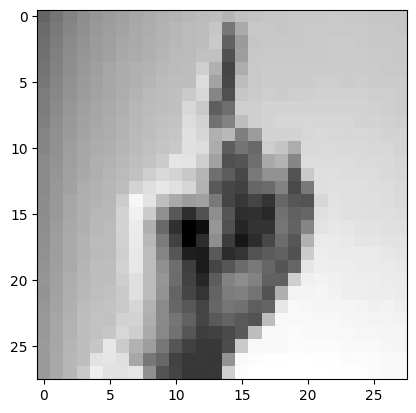

In [20]:
pic1 = np.reshape(train_input_array[0], (28, 28))
plt.imshow(pic1, cmap = "gray")   
print("Letter: ", letters[train_output_array[0]]) #letters['key']

Text(0.5, 1.0, 'X')

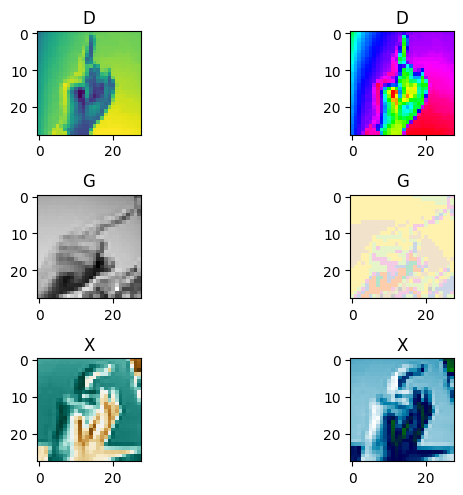

In [21]:
# using padding
rows_for_plot = 3
columns_for_plot = 2

pic1 = np.reshape(train_input_array[0], (28, 28)) 
plt.subplot(rows_for_plot, columns_for_plot, 1)  #(row, columns, panel number)
plt.imshow(pic1)
plt.title(letters[train_output_array[0]])

plt.subplot(rows_for_plot, columns_for_plot, 2)  #(row, columns, panel number)
pic1 = np.reshape(train_input_array[0], (28, 28))
plt.imshow(pic1, cmap = "hsv")
plt.title(letters[train_output_array[0]])

plt.tight_layout(pad=1.0)      # To make a space between the plots
 
pic2 = np.reshape(train_input_array[1], (28, 28))
plt.subplot(rows_for_plot, columns_for_plot, 3)  #(row, columns, panel number)
plt.imshow(pic2, "gray")
plt.title(letters[train_output_array[1]])

plt.subplot(rows_for_plot, columns_for_plot, 4)  #(row, columns, panel number)
plt.imshow(pic2, cmap = "Pastel2")
plt.title(letters[train_output_array[1]])

plt.tight_layout(pad=1.0)      # To make a space between the plots

pic3 = np.reshape(train_input_array[-1], (28, 28))
plt.subplot(rows_for_plot, columns_for_plot, 5)  #(row, columns, panel number)
plt.imshow(pic3, "BrBG")
plt.title(letters[train_output_array[-1]])

plt.subplot(rows_for_plot, columns_for_plot, 6)  #(row, columns, panel number)
plt.imshow(pic3, cmap = "ocean")
plt.title(letters[train_output_array[-1]])

Link to check more cmap type: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [22]:
print(train_df[train_df["label"]==1].index.values)  # label: 1 = B
print(train_df[train_df["label"]==1].index.values[0])  # label: 1 = B

[   29    30    95 ... 27411 27417 27435]
29


Letter:  B


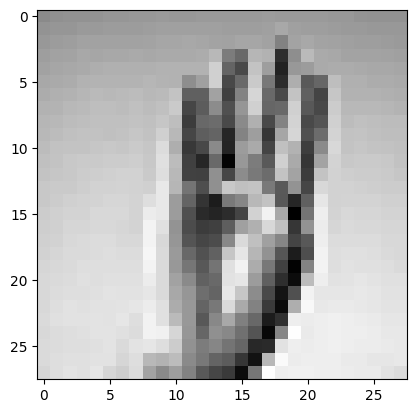

In [23]:
pic1 = np.reshape(train_input_array[29], (28, 28))
plt.imshow(pic1, cmap = "gray")   
print("Letter: ", letters[train_output_array[29]])

In [24]:
for plot_num in range(20):
  if (plot_num % 5 == 0): # to get space after every 5 plot 
    print(plot_num)

0
5
10
15


Label number:  0 Letter A index: 46
Label number:  1 Letter B index: 29
Label number:  2 Letter C index: 2
Label number:  3 Letter D index: 0
Label number:  4 Letter E index: 44
Label number:  5 Letter F index: 48
Label number:  6 Letter G index: 1
Label number:  7 Letter H index: 49
Label number:  8 Letter I index: 6
Label number:  10 Letter K index: 11
Label number:  11 Letter L index: 40
Label number:  12 Letter M index: 31
Label number:  13 Letter N index: 4
Label number:  14 Letter O index: 61
Label number:  15 Letter P index: 41
Label number:  16 Letter Q index: 5
Label number:  17 Letter R index: 16
Label number:  18 Letter S index: 10
Label number:  19 Letter T index: 19
Label number:  20 Letter U index: 14
Label number:  21 Letter V index: 21


Label number:  22 Letter W index: 7
Label number:  23 Letter X index: 23
Label number:  24 Letter Y index: 26


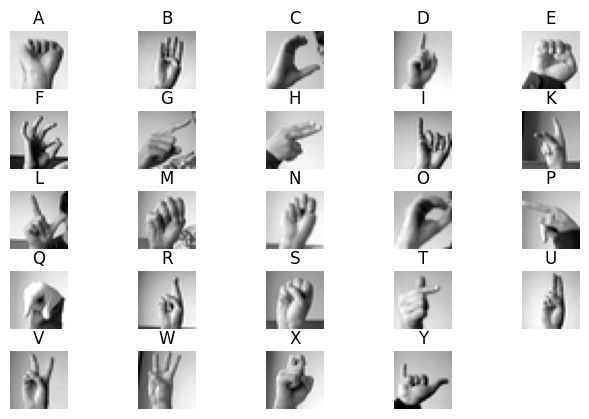

In [25]:
# using padding
rows_for_plot = 6
columns_for_plot = 5
label_list = train_df["label"].values
# plt.tight_layout(pad=1.0)      # To make a space between the plots
plot_num = 0

for i in range(0,26):
    if i in label_list:
      index = train_df[train_df["label"]==i].index.values[0]
      print("Label number: ", i , "Letter", letters[train_output_array[index]], "index:", index)

      plot_num += 1
      
      # plt.figure(figsize = (10,10))
      plt.subplot(rows_for_plot, columns_for_plot, plot_num)  #(row, columns, panel number)

      pic1 = np.reshape(train_input_array[index], (28, 28))
      plt.axis('off')
      
      plt.imshow(pic1, cmap = "gray")
      plt.title(letters[train_output_array[index].item()])
      
      if (plot_num % 5 == 0): # to get space after every 5 plot 
        plt.tight_layout(pad=1.0)
      else:
        plt.tight_layout(pad=0.0)


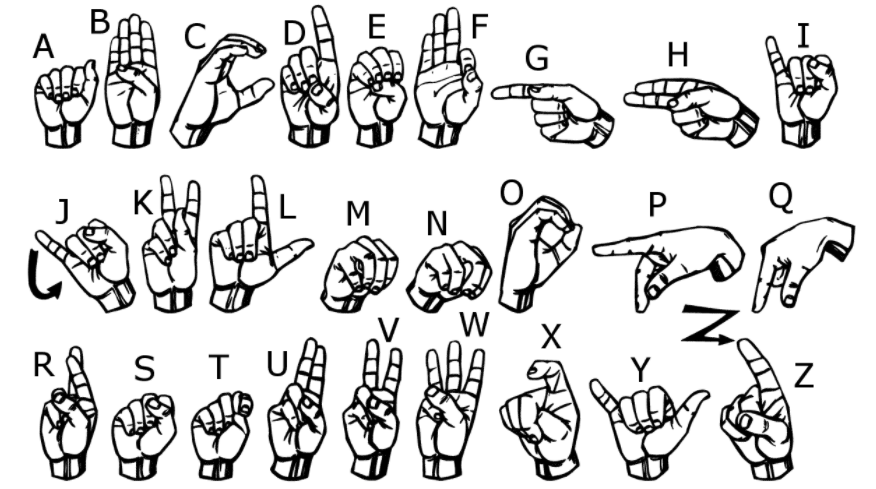


### Dataloader - Preparing Data for model

In [26]:
X = train_input_array.copy()
y = train_output_array.copy()
X_test = test_input_array.copy()
y_test = test_output_array.copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)
print(f"Shape of X train: {X_train.shape} \nShape of y train: {y_train.shape}")
print(f"Shape of X val: {X_val.shape} \nShape of y val:{y_val.shape}")

Shape of X train: (21964, 784) 
Shape of y train: (21964,)
Shape of X val: (5491, 784) 
Shape of y val:(5491,)


In [27]:
train_samples, n_features = X_train.shape
n_classes = np.unique(y_train).shape[0]
print("Number of training samples:", train_samples)
print("Number of feature in each sample:", n_features)
print("number of class:", n_classes)

Number of training samples: 21964
Number of feature in each sample: 784
number of class: 24


In [28]:
len(X_train[1])

784

Letter:  K


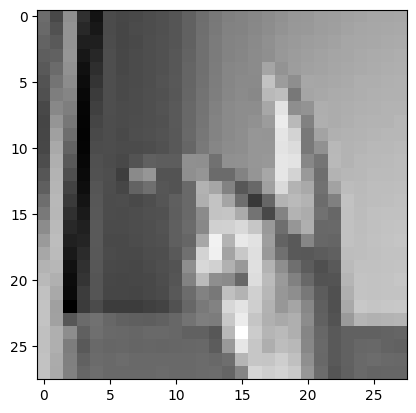

In [29]:
img = X_train[0]
label = y_train[0]
plt.imshow(img.reshape(28,28), cmap = 'gray')
print("Letter: ", letters[label])

## 04 Logistic Regression Model Training


In [30]:
log_reg_model = LogisticRegression(solver='lbfgs', multi_class = "multinomial", max_iter = 100)
log_reg_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

## 05 Model Evaluation

### Model Evaluation with Validation Dataset

In [31]:
y_pred = log_reg_model.predict(X_val)
# classification report
print("=========Classification report=======")
print(classification_report(y_val, y_pred)) 
# y_val is the real label
# y_pred is predicted label by Logistic Regression

=========Classification report=======
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       221
           1       1.00      1.00      1.00       188
           2       0.99      0.97      0.98       220
           3       0.96      0.96      0.96       256
           4       0.98      0.97      0.97       202
           5       0.90      0.91      0.91       242
           6       0.96      0.93      0.94       221
           7       0.93      0.93      0.93       205
           8       0.92      0.91      0.91       219
          10       0.92      0.89      0.91       219
          11       0.96      0.97      0.97       268
          12       0.97      0.99      0.98       232
          13       0.97      0.99      0.98       209
          14       0.96      0.97      0.97       219
          15       0.96      0.97      0.96       202
          16       0.97      0.98      0.98       291
          17       0.88      0.91      0.90

### Model Testing with Test Dataset

In [32]:
# print(letters)
# print(letters[0])

In [33]:
y_pred = log_reg_model.predict(X_test)

print("In Test Dataset, Total Number of Images:", len(y_pred))
print("Actual label of number of images for each label")
for i in range(len(letters)):
  print(letters[i], sum(y_test==i))

In Test Dataset, Total Number of Images: 7172
Actual label of number of images for each label
A 331
B 432
C 310
D 245
E 498
F 247
G 348
H 436
I 288
J 0
K 331
L 209
M 394
N 291
O 246
P 347
Q 164
R 144
S 246
T 248
U 266
V 346
W 206
X 267
Y 332
Z 0


In [34]:
print("Predictions label of number of images for each label")
for i in range(len(letters)):
  print(letters[i], sum(y_pred==i))

Predictions label of number of images for each label
A 344
B 348
C 284
D 251
E 483
F 294
G 371
H 361
I 305
J 0
K 198
L 283
M 426
N 193
O 203
P 443
Q 230
R 288
S 395
T 251
U 226
V 243
W 303
X 223
Y 226
Z 0


In [35]:
# classification report
print("=========Classification report=======")
print(classification_report(y_test, y_pred)) 
# y_test is the real label
# y_pred is predicted label by Logistic Regression

=========Classification report=======
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       331
           1       1.00      0.81      0.89       432
           2       0.89      0.82      0.85       310
           3       0.78      0.80      0.79       245
           4       0.84      0.81      0.82       498
           5       0.76      0.90      0.82       247
           6       0.68      0.73      0.71       348
           7       0.71      0.59      0.64       436
           8       0.56      0.59      0.58       288
          10       0.51      0.31      0.38       331
          11       0.65      0.89      0.75       209
          12       0.58      0.63      0.60       394
          13       0.65      0.43      0.52       291
          14       0.75      0.62      0.68       246
          15       0.71      0.91      0.80       347
          16       0.60      0.84      0.70       164
          17       0.21      0.42      0.28

In [36]:
print(X_test.shape)

(7172, 784)


In [37]:
print(letters)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


In [38]:
print(test_df[test_df["label"]==18].index.values[0:100])  # Check label S

[  38   68  141  164  176  214  229  287  329  346  383  423  431  437
  450  453  458  522  524  536  595  627  689  695  761  780  805  904
  924  953 1066 1081 1087 1089 1135 1184 1215 1242 1313 1314 1341 1404
 1420 1429 1492 1510 1556 1613 1615 1625 1663 1670 1697 1817 1822 1823
 1826 1858 1909 1968 1976 1992 2006 2023 2024 2057 2066 2088 2103 2263
 2267 2292 2339 2360 2549 2580 2642 2652 2674 2725 2763 2814 2819 2828
 3038 3039 3076 3079 3113 3116 3118 3121 3125 3174 3211 3247 3251 3284
 3316 3330]


Actual Letter:  S
Predicted Letter:  M


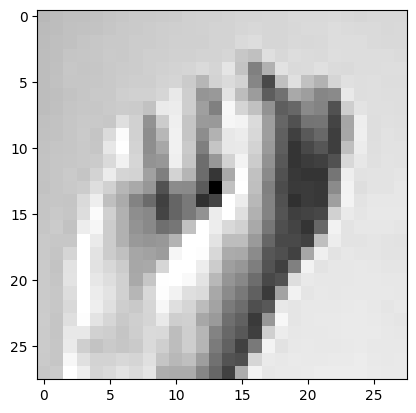

In [39]:
# we can check image from index 0 to 7171
# Check label S
index = 38
img = X_test[index]
actual_label = y_test[index]
predicted_label = y_pred[index]

print("Actual Letter: ", letters[actual_label.item()])
print("Predicted Letter: ", letters[predicted_label.item()])

plt.imshow(img.reshape(28,28), cmap = "gray")

In [40]:
print(test_df[test_df["label"]==1].index.values[0:100])  # Check label B

[  29   66   91  105  146  179  188  199  203  225  235  245  251  255
  291  293  304  332  342  350  357  364  407  416  421  432  438  448
  466  487  490  500  507  509  510  580  609  630  700  733  741  747
  774  778  793  801  802  829  853  854  856  876  897  903  905  915
  916  932  945  956  975  994 1012 1016 1047 1056 1060 1070 1099 1113
 1139 1149 1193 1198 1200 1211 1241 1253 1260 1273 1299 1315 1319 1321
 1330 1372 1385 1386 1423 1426 1428 1432 1437 1473 1488 1521 1527 1530
 1552 1581]


Actual Letter:  B
Predicted Letter:  B


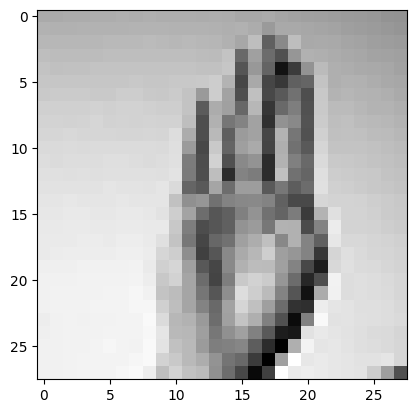

In [41]:
# we can check image from index 0 to 7171 (depend on test dataset)
# Check label B
index = 1047
img = X_test[index]
actual_label = y_test[index]
predicted_label = y_pred[index]

print("Actual Letter: ", letters[actual_label.item()])
print("Predicted Letter: ", letters[predicted_label.item()])

plt.imshow(img.reshape((28,28)), cmap = "gray")

## 06 Plotting Accuracy Graph

In [42]:
from sklearn.model_selection import learning_curve

estimator =LogisticRegression(multi_class = "multinomial", max_iter = 20)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    estimator = estimator, X=X, y=y,  cv=2, n_jobs=1, scoring="accuracy", return_times=True)

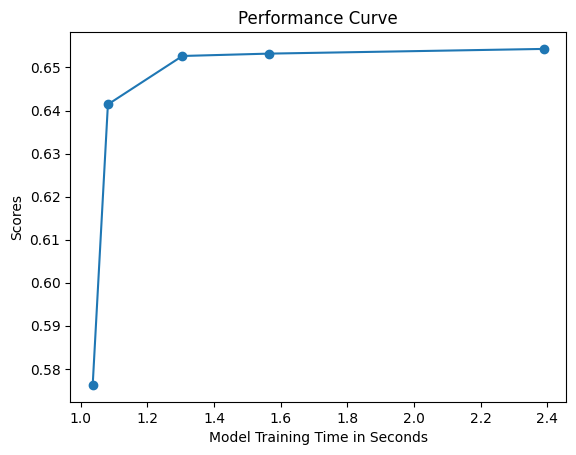

In [43]:
test_scores_mean = np.mean(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)

fit_time_argsort = fit_times_mean.argsort()

fit_time_sorted = fit_times_mean[fit_time_argsort]
test_scores_mean_sorted = test_scores_mean[fit_time_argsort]

plt.plot(fit_time_sorted, test_scores_mean_sorted, "o-")
plt.xlabel("Model Training Time in Seconds")
plt.ylabel("Scores")
plt.title("Performance Curve")
plt.show()